<a href="https://colab.research.google.com/github/charithcherry/Innomatics_Internship_APR_21/blob/main/Recommender%20System/Music_Rec_Sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd '/content/drive/MyDrive/musicdata/kaggle'


/content/drive/MyDrive/musicdata/kaggle


In [5]:
ls

kaggle_songs.txt                        MSDChallengeGettingstarted.pdf
kaggle_users.txt                        taste_profile_song_to_tracks.txt
kaggle_visible_evaluation_triplets.txt  unique_tracks.txt


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**VISIBLE EVALUTION TRIPLETS DATA**

In [7]:
df=pd.read_csv('kaggle_visible_evaluation_triplets.txt',sep='\t',names=['user_id','song_id','freq'])
df.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


DATA DESCRIPTION

In [8]:
df.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [9]:
df.shape

(1450933, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1450933 non-null  object
 1   song_id  1450933 non-null  object
 2   freq     1450933 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


NULL and DUPLICATE VALUES

In [11]:
df.isnull().sum()

user_id    0
song_id    0
freq       0
dtype: int64

In [12]:
sum(df.duplicated())

0

**UNIQUE TRACK DATA**

In [13]:
detail_df=pd.read_csv('unique_tracks.txt',sep='<SEP>',names=['track_id','song_id','artist_name','release'])
detail_df.head()

,track_id,song_id,artist_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [14]:
detail_df.shape

(1000000, 4)

In [15]:
detail_df.tail()

,track_id,song_id,artist_name,release
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday
999999,TRYYYVU12903CD01E3,SOWXJXQ12AB0189F43,Texta,Fernweh feat. Sektion Kuchikäschtli


NULL AND DUPLICATE VALUES

In [16]:
print("Number of null values \n{}.".format(detail_df.isnull().sum()))

Number of null values 
track_id        0
song_id         0
artist_name     0
release        15
dtype: int64.


In [17]:
print("Number of duplicate values {}".format(sum(detail_df.duplicated())))

Number of duplicate values 0


In [18]:
detail_df=detail_df.dropna()

In [19]:
detail_df.shape

(999985, 4)

In [20]:
print("Number of Null values are \n{}".format(detail_df.isnull().sum()))

Number of Null values are 
track_id       0
song_id        0
artist_name    0
release        0
dtype: int64


**MERGING DATAFRAMES**

In [21]:
song_df=pd.merge(df,detail_df,on='song_id')
song_df.head()


,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One


In [22]:
song_df.shape

(1491951, 6)

#Basic Statistics

In [23]:
print('Total Data Points',song_df.shape[0])
print('Total NO of users',song_df['user_id'].unique().shape[0])
print('Total number of songs',song_df['song_id'].unique().shape[0])
print('Total number of Tracks',song_df['track_id'].unique().shape[0])


Total Data Points 1491951
Total NO of users 110000
Total number of songs 163205
Total number of Tracks 163827


In [24]:
print('Number of unique release',song_df['release'].unique().shape[0])
print('Number of unique artists',song_df['artist_name'].unique().shape[0])

Number of unique release 137670
Number of unique artists 28366


In [25]:
song_df.describe()

,freq
count,1.491951e+06
mean,3.179720e+00
std,7.015025e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


# Distribution of Frequency column

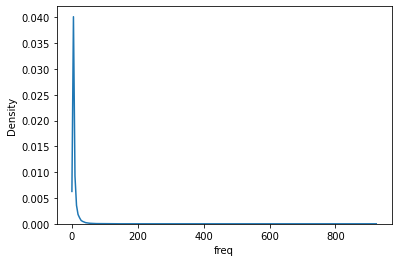

In [26]:
sns.kdeplot(data=song_df, x="freq")

# Number of songs listened per user

In [27]:
#groupby code
#using user_id,song_id
songs_per_user=song_df.groupby(['user_id'])['user_id'].value_counts()


In [28]:
songs_per_user

user_id                                   user_id                                 
00007a02388c208ea7176479f6ae06f8224355b3  00007a02388c208ea7176479f6ae06f8224355b3     9
00014a76ed063e1a749171a253bca9d9a0ff1782  00014a76ed063e1a749171a253bca9d9a0ff1782    11
00015189668691680bb1a2e58afde1541ec92ced  00015189668691680bb1a2e58afde1541ec92ced    17
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2  0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     9
00020fcd8b01986a6a85b896ccde6c49f35142ad  00020fcd8b01986a6a85b896ccde6c49f35142ad    32
                                                                                      ..
fffdef71f13352e9cff769f1d96f5ccf90f8955e  fffdef71f13352e9cff769f1d96f5ccf90f8955e     7
fffe29116f96c97b47a5dabdd406784ad0ba6f30  fffe29116f96c97b47a5dabdd406784ad0ba6f30     6
fffe5b73c50c72ca9c54947efac1fcacf59c4a17  fffe5b73c50c72ca9c54947efac1fcacf59c4a17    23
fffed0bee753cd78494011b8b55dafd4f5c7e5ff  fffed0bee753cd78494011b8b55dafd4f5c7e5ff    13
ffff07d7d9bb187aa58c7b81b3d

In [29]:
songs_per_user.sort_values().head()

user_id                                   user_id                                 
b4f681dac463c297568bffe7f4b646b74a5e6d0d  b4f681dac463c297568bffe7f4b646b74a5e6d0d    5
1691b9058739f0b88ac2777e5bbffe0e1d400f2d  1691b9058739f0b88ac2777e5bbffe0e1d400f2d    5
d1764e1f4626164793d400b95efb4a5f80a06cf9  d1764e1f4626164793d400b95efb4a5f80a06cf9    5
d1776bb80cf8298288974c52f903cc3b9601761a  d1776bb80cf8298288974c52f903cc3b9601761a    5
98d00906e235bede8d2b14b9cf5b802ee2438231  98d00906e235bede8d2b14b9cf5b802ee2438231    5
Name: user_id, dtype: int64

In [30]:
songs_per_user.sort_values().tail()

user_id                                   user_id                                 
016a24e91a72c159a5048ab1b9b2ba5ce761b526  016a24e91a72c159a5048ab1b9b2ba5ce761b526    54
3233c598c50f0ddbd351504e773cd51de79691db  3233c598c50f0ddbd351504e773cd51de79691db    55
d30e18323f15426c3cdc8585252ed34459916f51  d30e18323f15426c3cdc8585252ed34459916f51    55
ad4b2717e89766b66b96fe52a38736116e315874  ad4b2717e89766b66b96fe52a38736116e315874    57
316110734d8da7478cc33237458814f770a9eb7a  316110734d8da7478cc33237458814f770a9eb7a    57
Name: user_id, dtype: int64

In [31]:
songs_per_user.describe()

count    110000.000000
mean         13.563191
std           8.321649
min           5.000000
25%           7.000000
50%          11.000000
75%          18.000000
max          57.000000
Name: user_id, dtype: float64

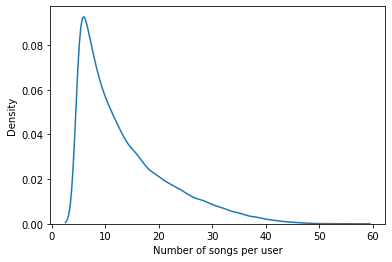

In [32]:
plt.xlabel('Number of songs per user')
sns.kdeplot(songs_per_user)
plt.show()

# Analysis of popular artist

In [33]:
#group by
#artistname and userid
artist_popularity=song_df.groupby(['artist_name'])['artist_name'].value_counts()


In [34]:
artist_popularity.sort_values().head()

artist_name                     artist_name                   
Özlem Tekin                     Özlem Tekin                       1
Nightmares On Wax feat. OC      Nightmares On Wax feat. OC        1
Hilt                            Hilt                              1
CLP feat. Spoek                 CLP feat. Spoek                   1
Hilltop Hoods / Pharoahe Monch  Hilltop Hoods / Pharoahe Monch    1
Name: artist_name, dtype: int64

In [35]:
artist_popularity.sort_values().tail()

artist_name             artist_name           
Eminem                  Eminem                     8160
Florence + The Machine  Florence + The Machine     8213
Justin Bieber           Justin Bieber              9259
Kings Of Leon           Kings Of Leon             11586
Coldplay                Coldplay                  13675
Name: artist_name, dtype: int64

In [36]:
# looking at cold play releases
song_df[song_df['artist_name']=='Coldplay']['release'].unique()

array(['Yellow', 'The Scientist', 'Fix You', "Don't Panic", 'Sparks',
       'Clocks', 'Life In Technicolor ii', 'Such A Rush',
       'Fix You (Live)', 'Speed Of Sound', 'Lost!',
       'God Put A Smile Upon Your Face', 'Brothers & Sisters',
       'A Rush Of Blood To The Head', 'Clocks (Live In Sydney)',
       'One I Love', 'For You', 'You Only Live Twice (Live From Norway)',
       'Shiver', 'Swallowed In The Sea', 'In My Place',
       'Postcards From Far Away', 'Glass Of Water',
       "Things I Don't Understand", 'Strawberry Swing', '42',
       'Til Kingdom Come', 'The Goldrush', 'X & Y', 'Life In Technicolor',
       'We Never Change', 'Bigger Stronger', 'What If', 'Trouble',
       "Everything's Not Lost (Includes Hidden Track 'Life Is For Living')",
       'Only Superstition', 'Politik', 'Careful Where You Stand',
       'Warning Sign', 'See You Soon', 'Spies', 'Cemeteries Of London',
       'A Whisper', 'A Message', 'Square One', 'Low', 'I Bloom Blaum',
       'I Ran Away',

In [37]:
# looking at justin beiber releases
song_df[song_df['artist_name']=='Justin Bieber']['release'].unique()

array(['Somebody To Love', 'Down To Earth', 'One Time', 'U Smile',
       'Favorite Girl', 'Love Me', 'Common Denominator',
       'Never Let You Go', 'Stuck In The Moment', 'Up',
       'One Less Lonely Girl', 'That Should Be Me', 'Bigger',
       'Runaway Love'], dtype=object)

In [38]:
sorted_artist_popularity=artist_popularity.sort_values(ascending=False)

Text(0.5, 1.0, 'popularity and artist')

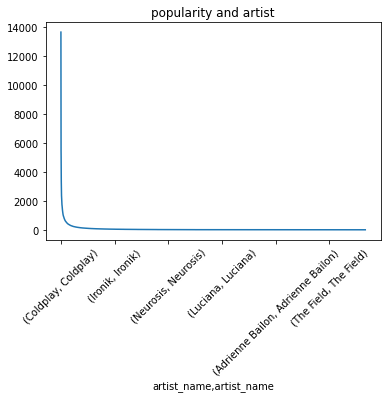

In [39]:
# plotting of popularity and artist

sorted_artist_popularity.plot.line()
plt.xticks(rotation=45)
plt.title('popularity and artist')

# Analysis of popularity song

In [40]:
# using release and userid
song_popularity=song_df.groupby(['release'])['release'].value_counts()


In [41]:
song_popularity.sort_values().head()

release                    release                  

Ef Ég Hefði Aldrei...     
Ef Ég Hefði Aldrei...       1
Makin' me hot              Makin' me hot                1
Makin' Money               Makin' Money                 1
Makin' Magic               Makin' Magic                 1
Makin' Love To A Murderer  Makin' Love To A Murderer    1
Name: release, dtype: int64

In [42]:
song_popularity.sort_values().tail()

release                         release                       
Dog Days Are Over (Radio Edit)  Dog Days Are Over (Radio Edit)    3780
Use Somebody                    Use Somebody                      3822
You're The One                  You're The One                    4270
Undo                            Undo                              4483
Sehr kosmisch                   Sehr kosmisch                     5043
Name: release, dtype: int64

In [43]:
sorted_song_popularity=song_popularity.sort_values(ascending=False)

In [44]:
# plot betweeen popularity and song

Text(0.5, 1.0, 'popularity and song')

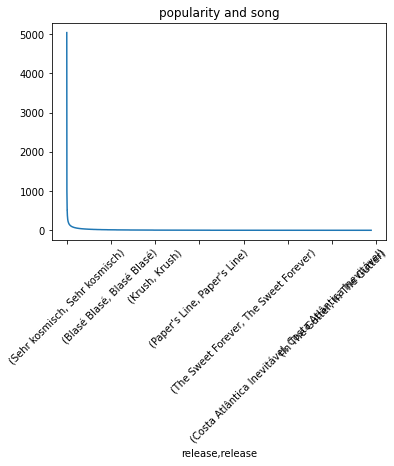

In [45]:
sorted_song_popularity.plot.line()
plt.xticks(rotation=45)
plt.title('popularity and song')

In [46]:
song_df.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

In [47]:
repeated=song_df.groupby(['freq'])['song_id'].value_counts()

In [48]:
repeated

freq  song_id           
1     SOFRQTD12A81C233C0    2149
      SOWCKVR12A8C142411    2040
      SOAXGDH12A8C13F8A1    1693
      SODGVGW12AC9075A8D    1616
      SOAUWYT12A81C206F1    1597
                            ... 
537   SOFVLYV12A8C145D8F       1
582   SONGOJV12AF729AEBD       1
597   SOAOXTG12A67021AA7       1
646   SOPMHHE12AB01845F6       1
923   SOXTUWG12AB018A2E2       1
Name: song_id, Length: 406253, dtype: int64

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 <a list of 11 Text major ticklabel objects>)

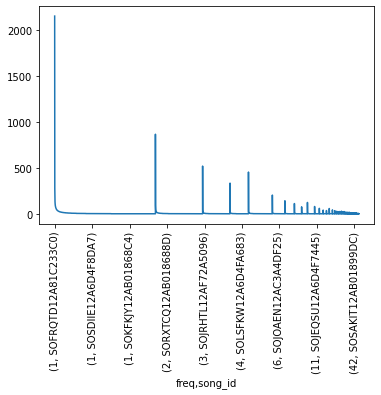

In [55]:
repeated.plot.line()
plt.xticks(rotation=90)

In [50]:
repeated.dtype

dtype('int64')

In [51]:
song_df.columns

Index(['user_id', 'song_id', 'freq', 'track_id', 'artist_name', 'release'], dtype='object')

In [52]:
song_grouped=song_df.groupby(['release']).agg({'freq':'count'}).reset_index()

In [53]:
song_grouped.head()

,release,freq
0,Ef Ég Hefði Aldrei...,1
1,Light Mass Prayers,4
2,"The Arsonist Story"": Evil Craves Attention/O...",1
3,Ég Átti Gráa Æsku,4
4,(Jack The Stripper),2


In [54]:
grouped_sum=song_grouped['freq'].sum()
song_grouped['percentage']=(song_grouped['freq']/grouped_sum)*100
song_grouped.sort_values(['freq','release'],ascending=[0,1])

,release,freq,percentage
98845,Sehr kosmisch,5043,0.338014
125437,Undo,4483,0.300479
136114,You're The One,4270,0.286202
126033,Use Somebody,3822,0.256175
28727,Dog Days Are Over (Radio Edit),3780,0.253360
...,...,...,...
137656,Último Desejo,1,0.000067
137658,Über Grenzen Geh'n,1,0.000067
137660,Übers Geld (Skit),1,0.000067
137662,Üdvözöl A Pokol,1,0.000067
